# Align $X$ and $Y$ 
##### This is due to the fact that they both have different sizes.

$$TR = 1.3s$$

In [1]:
import pandas as pd
import numpy as np


Y_npy_file = "/Volumes/LaCie/EPFL/Mastersem3/SemesterProjectND/Y/sub2/After_The_Rain/Y_voxels.npy"
X_csv_file = '/Volumes/LaCie/EPFL/Mastersem3/SemesterProjectND/DataframeX/After_The_Rain_exp/Final_df.csv'
X = pd.read_csv(X_csv_file)
Y = np.load(Y_npy_file)


In [ ]:
# X feature dataframe
# Create TR intervals (1.3s each) starting from 0 seconds
TR_duration = 1.3
num_TRs = int(X['Time (s)'].max() // TR_duration)

# Assign TR indices to each time point
X['TR'] = (X['Time (s)'] // TR_duration).astype(int)

In [18]:
# Group by TR and compute the mean for each feature
X_avg = X.groupby('TR').mean().reset_index()

# Drop the 'Time (s)' column if not needed
X_avg = X_avg.drop(columns=['Time (s)'], errors='ignore')


import numpy as np

# Select columns whose names start with 'Object', 'Action', or 'Scene'
columns_to_round = [col for col in X_avg.columns if col.startswith(('Object', 'Action', 'Scene'))]

# Apply rounding: Set all non-zero values to 1
X_avg[columns_to_round] = np.where(X_avg[columns_to_round] != 0, 1, 0)

X_avg = X_avg.drop(columns=['TR'], errors='ignore')


In [19]:
X_avg

,Brightness Value,Contrast Value,Sharpness Value,Scene,Frame,action_abseiling,action_barbequing,action_beatboxing,action_belly dancing,action_bending metal,...,Scene_stage/indoor,Scene_street,Scene_subway_station/platform,Scene_veterinarians_office,Scene_water_tower,Scene_zen_garden,Texture contrast,Correlation,Energy,Homogeneity
0,161.032691,37.410769,10.053784,1,12.629032,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,3.001401,0.999077,0.096727,0.820926
1,153.715099,80.523701,60.663986,1,41.245902,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,24.725873,0.998192,0.120046,0.819347
2,111.912112,106.437457,213.249286,1,68.180328,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,61.412335,0.997281,0.314391,0.821822
3,57.664800,79.547980,278.187740,1,83.426230,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,117.273529,0.989731,0.259266,0.627362
4,58.252782,70.501853,284.700181,1,124.081967,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,113.393035,0.988654,0.216566,0.551224
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
377,137.481657,53.518588,1467.393453,1,8103.180328,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0,284.860882,0.959581,0.111402,0.281927
378,151.010977,59.675725,1519.502944,1,7633.333333,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,308.986220,0.956624,0.014015,0.200762
379,150.990709,60.034447,1426.094793,1,9346.887097,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,297.780914,0.958696,0.014187,0.205034
380,148.688863,50.520791,709.376450,0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,162.538108,0.976548,0.025940,0.349854


In [4]:
Y.shape

(555, 216990)

#### The following needs to be rectified according to the 4TR variation (!)

In [ ]:

# TRs to remove : 90 / 1.3 = ≈ 69.23

TRs_to_remove = 69

#### We start by removing the washed out element from the fmri :
Y_trimmed = Y[TRs_to_remove:-TRs_to_remove]
#print(Y_trimmed.shape)

start = int(np.floor((Y_trimmed.shape[0]-X_avg.shape[0])/2))

Y_weird = Y_trimmed[start: -(start+1)]
#print(np.floor((Y_trimmed.shape[0]-X_avg.shape[0])/2))
#print(int(np.floor((Y_trimmed.shape[0]-X_avg.shape[0])/2)))
print(Y_weird.shape)

(417, 216990)
(382, 216990)


In [ ]:
import nibabel as nib
import numpy as np

# Assuming fmri_img is a NIfTI image loaded using nibabel
fmri_img = nib.load("/Volumes/LaCie/EPFL/Mastersem3/SemesterProjectND/Y/sub2/After_The_Rain/smoothed_fmri.nii.gz")
data = fmri_img.get_fdata()  # Get the image data as a NumPy array

# Define the number of TRs to remove
TRs_to_remove = 69

##### We start by removing the washed out element from the fmri : #####
# Step 1: Trim the time points (removing 69 time points from both ends)
data_trimmed = data[..., TRs_to_remove:-TRs_to_remove]  # Trim the last and first 69 time points

# Check the shape of the trimmed data
print(f"Trimmed data shape: {data_trimmed.shape}")

# Step 2: Adjust the time points to match X_avg
# Assuming X_avg.shape[0] is the number of time points you want in the trimmed data
start = int(np.floor((data_trimmed.shape[3] - X_avg.shape[0]) / 2))

# Step 3: Extract the portion of the data to match the shape of X_avg
data_weird = data_trimmed[..., start: -(start + 1)]  # Slice to align with X_avg

# Check the final shape
print(f"Final trimmed data shape: {data_weird.shape}")

affine = fmri_img.affine  # Get the affine matrix from the original image

# Step 1: Create a new NIfTI image with data_weird and the original affine matrix
new_fmri_img = nib.Nifti1Image(data_weird, affine)

Trimmed data shape: (91, 109, 91, 417)
Final trimmed data shape: (91, 109, 91, 382)


### Several ways of applying GLM

#### 1) With nilearn for neuro-imaging data, might be good

In [45]:
import numpy as np
from nilearn.glm.first_level import FirstLevelModel

# Example: Create design matrix for fMRI
# X is the design matrix (regressors)
# Y is the fMRI data (time series of voxels around the brain)
# new_fmri_img is the trimmed fmri data

# Initialize the GLM model
model = FirstLevelModel(t_r=1.3, slice_time_ref=0.5)

# Fit the model to your data
model.fit(new_fmri_img, design_matrices=X_avg)

# Get the results
#z_map = model.compute_contrast()

FirstLevelModel(slice_time_ref=0.5, t_r=1.3)

In [46]:
# Create a contrast vector for comparing brightness and contrast
contrast_def = np.zeros(200)  # nb of feature columns

contrast_def[0] = 1  # Brightness 
contrast_def[1] = -1  # Contrast 

# Compute the contrast
z_map = model.compute_contrast(contrast_def)

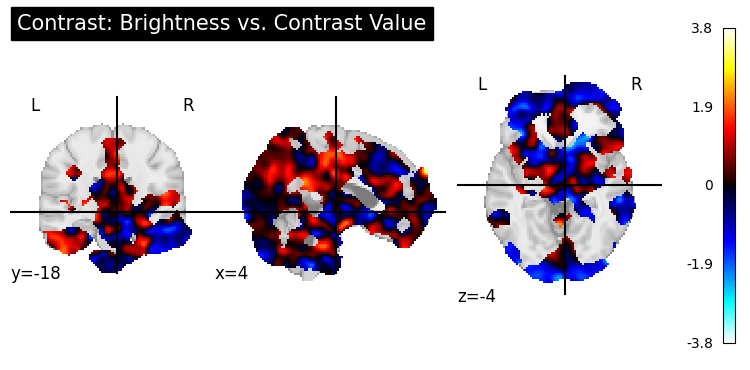

In [ ]:
from nilearn import plotting

# Visualize the contrast result (z_map)
plotting.plot_stat_map(z_map, title="Contrast: Brightness vs. Contrast Value", display_mode='ortho', draw_cross=True, colorbar=True)

# Show the plot
plotting.show()


In [37]:
fmri_img.shape

(91, 109, 91, 555)

In [44]:
X_avg.columns.tolist()

['Brightness Value',
 'Contrast Value',
 'Sharpness Value',
 'Scene',
 'Frame',
 'action_abseiling',
 'action_barbequing',
 'action_beatboxing',
 'action_belly dancing',
 'action_bending metal',
 'action_bungee jumping',
 'action_busking',
 'action_changing oil',
 'action_checking tires',
 'action_cleaning gutters',
 'action_cleaning shoes',
 'action_cleaning windows',
 'action_contact juggling',
 'action_dancing ballet',
 'action_dancing charleston',
 'action_driving car',
 'action_extinguishing fire',
 'action_filling eyebrows',
 'action_giving or receiving award',
 'action_grooming dog',
 'action_high kick',
 'action_hockey stop',
 'action_hugging',
 'action_ice climbing',
 'action_jogging',
 'action_jumpstyle dancing',
 'action_kissing',
 'action_parkour',
 'action_playing accordion',
 'action_playing chess',
 'action_playing paintball',
 'action_playing poker',
 'action_playing saxophone',
 'action_pumping fist',
 'action_pumping gas',
 'action_pushing car',
 'action_pushing wheel